In [1]:
%load_ext autoreload
%autoreload 2

%autosave 10

Autosaving every 10 seconds


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_palette("Set2")
%matplotlib widget

plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Palatino"],
    }
)

In [3]:
df = pd.read_csv('../_temp/beta_gamma.csv',index_col=0)

In [4]:
snr_means = df.groupby('snr').mean()
snr_means

,svm_train,svm_valid,cnn1d_train,cnn1d_valid,cnn2d_train,cnn2d_valid,ar_train,ar_valid
snr,,,,,,,,
0.20,0.730861,0.565615,0.769909,0.564119,0.784096,0.629039,0.982985,0.646158
0.25,0.674029,0.627838,0.703303,0.674126,0.784067,0.688711,0.969762,0.700999
0.30,0.719269,0.668126,0.775033,0.702102,0.881518,0.697357,0.927165,0.747717
0.35,0.784681,0.755239,0.777510,0.756817,0.907896,0.753072,0.939677,0.829852
0.40,0.816695,0.789914,0.814363,0.788440,0.911010,0.780719,0.950365,0.851519
0.45,0.854092,0.829196,0.857240,0.821040,0.914604,0.819852,0.947232,0.876312
0.50,0.876205,0.837333,0.879081,0.826707,0.893771,0.843680,0.968184,0.875933
0.55,0.900110,0.854117,0.912240,0.849191,0.925273,0.861115,0.981513,0.917772
0.60,0.923234,0.887898,0.924346,0.877983,0.957847,0.874515,0.961323,0.931251


Text(0.5, 1.0, 'Beta/Gamma ERD/ERS')

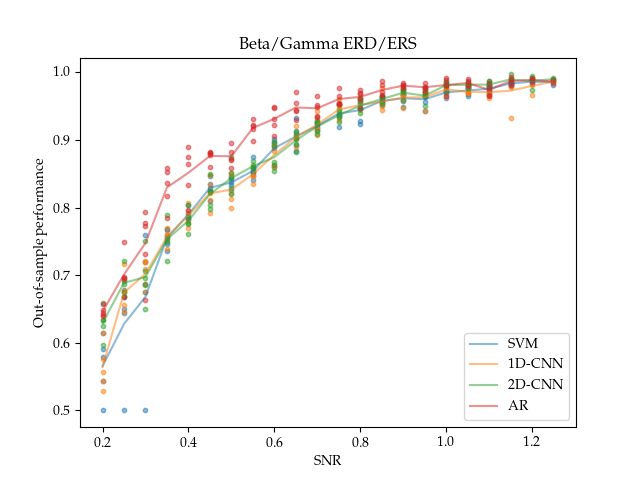

In [5]:
fig, ax = plt.subplots()

ax.scatter(df['snr'],df['svm_valid'], alpha=0.5, s=10, c='C0')
ax.scatter(df['snr'],df['cnn1d_valid'], alpha=0.5, s=10, c='C1')
ax.scatter(df['snr'],df['cnn2d_valid'], alpha=0.5, s=10, c='C2')
ax.scatter(df['snr'],df['ar_valid'], alpha=0.5, s=10, c='C3')


ax.plot(snr_means.index,snr_means['svm_valid'], alpha=0.5, c='C0', label='SVM')
ax.plot(snr_means.index,snr_means['cnn1d_valid'], alpha=0.5, c='C1', label='1D-CNN')
ax.plot(snr_means.index,snr_means['cnn2d_valid'], alpha=0.5, c='C2', label='2D-CNN')
ax.plot(snr_means.index,snr_means['ar_valid'], alpha=0.5, c='C3', label='AR')

ax.set_xlabel('SNR')
ax.set_ylabel('Out-of-sample performance')
ax.legend()

ax.set_title('Beta/Gamma ERD/ERS')